<a href="https://colab.research.google.com/github/1phalleyscomet/2025-1/blob/main/machinlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

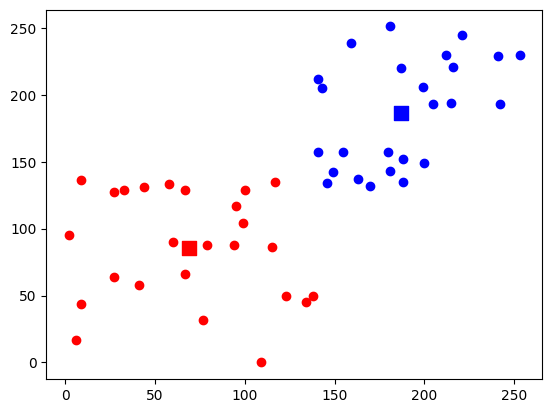

In [ ]:
#k-means rand num cluster
import numpy as np,cv2
import matplotlib.pyplot as plt

a=np.random.randint(0,150,(25,2))
b=np.random.randint(128,255,(25,2))
data=np.vstack((a,b)).astype(np.float32)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
ret,label,center=cv2.kmeans(data,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
red=data[label.ravel()==0]
blue=data[label.ravel()==1]

plt.scatter(red[:,0],red[:,1],c='r')
plt.scatter(blue[:,0],blue[:,1],c='b')
plt.scatter(center[0,0],center[0,1],s=100,c='r',marker='s')
plt.scatter(center[1,0],center[1,1],s=100,c='b',marker='s')
plt.show()

In [ ]:
#16 of color cluster
import cv2
import numpy as np

k=16
img=cv2.imread('img_latte.png')
data=img.reshape((-1,3)).astype(np.float32)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center=np.uint8(center)
result=center[label.flatten()]
result=result.reshape((img.shape))
merged=np.hstack((img,result))
cv2.imshow('result',merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#MNIST handwright num image-set common module
import numpy as np,cv2
data=None
k=list(range(10))

def load():
    global data
    image=cv2.imread('mnist.png') #http://yann.lecun.com/exdb/mnist/
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    cells=[np.hsplit(row,100) for row in np.vsplit(gray,50)]
    data=np.array(cells)

def getData(reshape=True):
    if data is None:  load()
    if reshape:
        full=data.reshape(-1,400).astype(np.float32)
    else:
        full=data
    labels=np.repeat(k,500).reshape(-1,1)
    return (full, labels)

def getTrain(reshape=True):
    if data is None: load()
    train = data[:,:90]
    if reshape:
        train = train.reshape(-1,400).astype(np.float32)
    train_labels=np.repeat(k,450).reshape(-1,1)
    return(train,train_labels)

def getTest(reshape=True):
    if data is None: load()
    test = data[:,90:100]
    if reshape:
        test = test.reshape(-1,400).astype(np.float32)
    test_labels=np.repeat(k,50).reshape(-1,1)
    return(test,test_labels)

def digit2data(src,reshape=True):
    h,w=src.shape[:2]
    square=src
    if h>w:
        pad=(h-w)//2
        square=np.zeros((h,h),dtype=np.uint8)
        square[:,pad:pad+w, :]=src
    elif h<w:
        pad=(w-h)//2
        square=np.zeros((w,w),dtype=np.uint8)
        square[pad:pad+h,:]=src
    px20=np.zeros((20,20),np.uint8)
    px20[2:18,2:18]=cv2.resize(square,(16,16),interpolation=cv2.INTER_AREA)
    if reshape:
        px20=px20.reshape((1,400)).astype(np.float32)
    return px20

In [ ]:
#MNIST handwright cluster using k-means
import cv2,numpy as np
import matplotlib.pyplot as plt
import mnist

data,_=mnist.getData()
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
ret,label,center=cv2.kmeans(data,10,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
for i in range(10):
    cent_img=center[i].reshape(20,20).astype(np.uint8)
    plt.subplot(2,5,i+1)
    plt.imshow(cent_img,'gray')
    plt.xticks([]);plt.yticks([])
plt.show()

ret:1.0,result:[[1.]],neighbours:[[0. 1. 1.]],distance:[[ 16. 197. 360.]]


/tmp/ipython-input-4214666977.py:9: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(red[:,0],red[:,1],80,'r','^')
/tmp/ipython-input-4214666977.py:10: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(blue[:,0],blue[:,1],80,'b','s')
/tmp/ipython-input-4214666977.py:12: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')


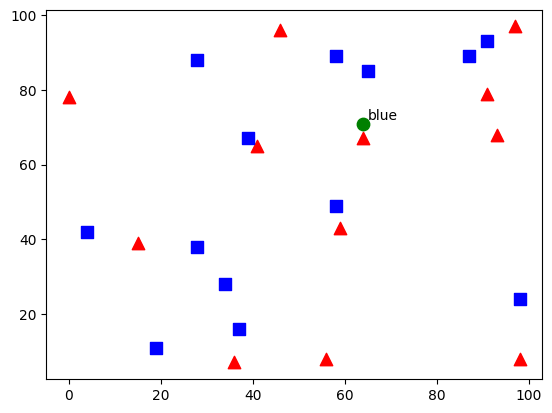

In [ ]:
#k-nn rand num cluster
import cv2, numpy as np
import matplotlib.pyplot as plt

trainData=np.random.randint(0,100,(25,2)).astype(np.float32)
labels=np.random.randint(0,2,(25,1))
red=trainData[labels.ravel()==0]
blue=trainData[labels.ravel()==1]
plt.scatter(red[:,0],red[:,1],80,'r','^')
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
newcomer=np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
knn=cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,labels)
ret,results,neighbours,dist=knn.findNearest(newcomer,3)
print('ret:%s,result:%s,neighbours:%s,distance:%s'%(ret,results,neighbours,dist))
plt.annotate('red' if ret==0.0 else 'blue',xy=newcomer[0],xytext=(newcomer[0]+1))
plt.show()

ret:1.0,result:[[1.]],neighbours:[[1. 1. 1.]],distance:[[170. 314. 866.]]


/tmp/ipython-input-237262822.py:9: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(action[:,0],action[:,1],80,'b','^',label='action')
/tmp/ipython-input-237262822.py:10: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(comedy[:,0],comedy[:,1],80,'r','s',label='comedy')
/tmp/ipython-input-237262822.py:12: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(newcomer[:,0],newcomer[:,1],200,'g','s',label='new')


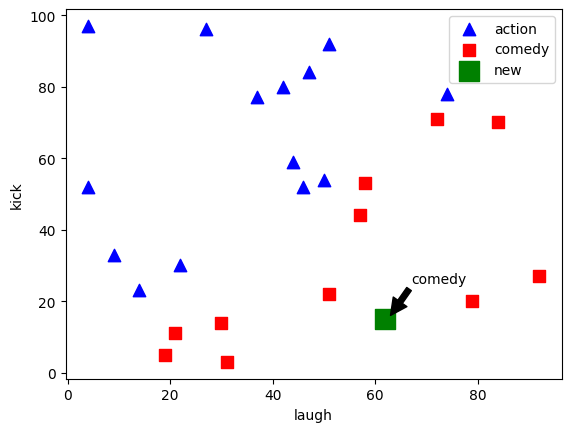

In [ ]:
#k-nn movie cluster
import cv2, numpy as np
import matplotlib.pyplot as plt

trainData=np.random.randint(0,100,(25,2)).astype(np.float32)
responses=(trainData[:,0]>trainData[:,1]).astype(np.float32)
action=trainData[responses==0]
comedy=trainData[responses==1]
plt.scatter(action[:,0],action[:,1],80,'b','^',label='action')
plt.scatter(comedy[:,0],comedy[:,1],80,'r','s',label='comedy')
newcomer=np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],200,'g','s',label='new')

knn=cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)
ret,results,neighbours,dist=knn.findNearest(newcomer,3)
print('ret:%s,result:%s,neighbours:%s,distance:%s'%(ret,results,neighbours,dist))
anno_x,anno_y=newcomer.ravel()
label='action' if ret==0 else 'comedy'
plt.annotate(label,xy=(anno_x+1,anno_y+1),xytext=(anno_x+5,anno_y+10),arrowprops={'color':'black'})
plt.xlabel('laugh');plt.ylabel('kick')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#MNIST handwright num learning w/knn
import numpy as np,cv2
import mnist

train,train_labels=mnist.getTrain()
test,test_labels=mnist.getTest()
knn=cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)
for k in range(1,11):
    ret,result,neighbours,dist=knn.findNearest(test,k=k)
    correct=np.sum(result==test_labels)
    accuracy=correct/result.size*100.0
    print('k=%s,accuracy=%.2f%%(%d/%d)'%(k,accuracy,correct,result.size))

In [ ]:
#handwright num cog
import numpy as np,cv2
import mnist
train,train_labels=mnist.getData()
knn=cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)

img=cv2.imread('img1.png')
cv2.imshow('img',img)
cv2.waitkey(0)

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.GaussianBlur(gray,(5,5),0)
_,gray=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
img,contours,_=cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    x,y,w,h=cv2.boundingRect(cnt)
    if w>=5 and h>=25:
        roi=gray[y:y+h,x:x+w]
        cv2.ractangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        px20=mnist.digit2data(roi)
        ret,result,neighbours,dist=knn.findNearest(data,k=1)
        cv2.putText(img,'%d'%ret,(x,y+155),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

ret:0.0,result:[[0.]]


/tmp/ipython-input-2427887466.py:13: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(red[:,0],red[:,1],80,'r','^')
/tmp/ipython-input-2427887466.py:15: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(blue[:,0],blue[:,1],80,'b','s')
/tmp/ipython-input-2427887466.py:17: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')


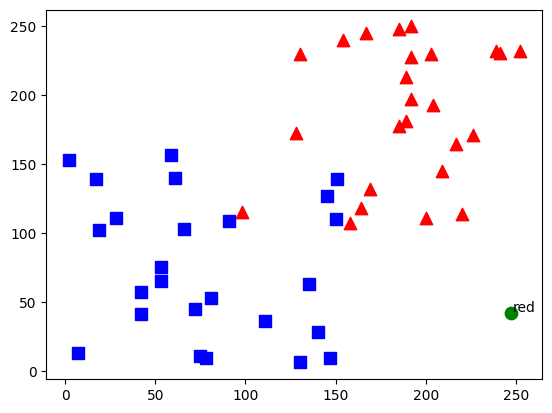

In [ ]:
#SVM rand num org
import cv2
import numpy as np
import matplotlib.pylab as plt

a=np.random.randint(0,158,(25,2))
b=np.random.randint(98,255,(25,2))
trainData=np.vstack((a,b)).astype(np.float32)
responses=np.zeros((50,1),np.int32)
responses[:25]=1

red=trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
blue=trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
newcomer=np.random.randint(0,255,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
svm=cv2.ml.SVM_create()
svm.trainAuto(trainData,cv2.ml.ROW_SAMPLE,responses)
svm.save('svm_rand.xml')
svm2=cv2.ml.SVM_load('svm_rand.xml')
ret,result=svm2.predict(newcomer)
plt.annotate('red' if ret==0 else 'blue',xy=newcomer[0],xytext=(newcomer[0]+1))
print('ret:%s,result:%s'%(ret,result))
plt.show()


In [ ]:
#MNIST hand-write HOG_SVM learning
import cv2
import numpy as np
import mnist
import time

affine_flags=cv2.WARP_INVERSE_MAP|cv2.INTER_LINEAR
def deskew(img):
    m=cv2.moments(img)
    if abs(m['mu02'])<1e-2:
        return img.copy()
        skew=m['mu11']/m['mu02']
        M=np.float32([[1,skew,-0.5*20*skew],[0,1,0]])
        img=cv2.warpAffine(img,M,(20,20),flags=affine_flags)
        return img

winSize=(20,20)
blockSize=(10,10)
blockStride=(5,5)
cellSize=(5,5)
nbins=9
hogDesc=cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)

if __name__=='__main__':
    train_data,train_label=mnist.getTrain(reshape=False)
    test_data,test_label=mnist.getTest(reshape=False)
    deskewed=[list(map(deskew,row)) for row in train_data]
    hogdata=[map(hogDesc.compute,row) for row in deskewed]
    train_data=np.float32(hogdata)
    print('SVM training started...train data:',train_data.shape)
    train_data=train_data.reshape(-1,train_data.shape[2])
    svm=cv2.ml.SVM_create()
    startT=time.time()
    svm.trainAuto(train_data,cv2.ml.ROW_SAMPLE,train_label)
    endT=time.time()-startT
    print('SVM training complete. %.2f Min'%(endT/60))
    svm.save('svm_mnist.xml')

    deskewed=[list(map(deskew,row)) for row in test_data]
    hogdata=[map(hogDesc.compute,row) for row in deskewed]
    test_data=np.float32(hogdata)
    test_data=test_data.reshape(-1,test_data.shape[2])
    ret,result=svm.predict(test_data)
    correct=(result==test_label).sum()
    print('accuracy=%.2f%%(%d/%d)'%(correct*100.0/result.size))


In [ ]:
#HOG-SVM hand write num rec
import cv2
import numpy as np
import mnist
import svm_mnist_hog_train #MNIST hand-write HOG_SVM learning

svm=cv2.ml.SVM_load('svm_mnist.xml')
img=cv2.imread('img1.png')
cv2.imshow('img',img)
cv2.waitKey(0)

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.GaussianBlur(gray,(5,5),0)
_,gray=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
img,contours,_=cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    (x,y,w,h)=cv2.boundingRect(c)
    if w>=5 and h>=25:
        roi=gray[y:y+h,x:x+w]
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        px20=mnist.digit2data(roi,False)
        deskewed=svm_mnist_hog_train.deskew(px20)
        hogdata=svm_mnist_hog_train.hogDesc.compute(deskewed)
        test_data=np.float32(hogdata).reshape(-1,hogdata[0])
        ret,result=svm.predict(test_data)
        cv2.putText(img,'%d'%result[0],(x,y+155),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,0),2)
        cv2.imshow('img',img)
        cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#HOG_SVM pedsrian detect
import cv2

hogdef=cv2.HOGDescriptor()
hogdef.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogdaim=cv2.HOGDescriptor((48,96),(16,16),(8,8),(8,8),9)
hogdaim.setSVMDetector(cv2.HOGDescriptor_getDaimlerPeopleDetector())
cap=cv2.VideoCapture('pedestrians.avi')
mode=True
print('Toggle Space-bar to change mode.')
while cap.isOpened():
    ret,img=cap.read()
    if ret:
        if mode:
            found,_=hogdef.detectMultiScale(img)
            for (x,y,w,h) in found:
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0))
            else:
                found,_=hogdaim.detectMultiScale(img)
                for (x,y,w,h) in found:
                    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0))
                cv2.putText(img,'Detector:%s'%('Default' if mode else 'Daimler'),(10,50),cv2.FONT_HERSHEY_DUPLEX,1,(0,255,0),1)
                cv2.imshow('frame',img)
                key=cv2.waitKey(1)
                if key==27:
                    break
                elif key==ord(' '):
                    mode=not mode
        else:
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#plain and bike rec w/ BOW and SVM
import cv2
import numpy as np
import os,glob,time

startT=time.time()
categories=['airplanes','Motorbikes']
dictionary_size=50
base_path=''#학습 이미지 기본경로
dict_file=''#사전 객체를 저장할 파일 이름
svm_model_file=''#SVM모델 객체 저장할 파일 이름

detector=cv2.xfeatures2d.SIFT_create()
matcher=cv2.BFMatcher(cv2.NORM_L2)
bowTrainer=cv2.BOWKMeansTrainer(dictionary_size)
bowExtractor=cv2.BOWImgDescriptorExtractor(detector,matcher)

train_paths=[]
train_labels=[]
print('Adding descriptor to BOWTrainer...')
for idx,category in enumerate(categories):
    dir_path=base_path+category
    img_paths=glob.glob(dir_path+'/*.jpg')
    img_len=len(img_paths)
    for i,img_path in enumerate(img_paths):
        train_paths.append(img_path)
        train_labels.append(idx)
        img=cv2.imread(img_path)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        kpt,des=detector.detectAndCompute(gray,None)
        bowTrainer.add(des)
        print('\t%s %d/%d(%.2f%%)'%(category,i+1,img_len,(i+1)/img_len*100),end='\r')
    print()
print("Adding descriptor completed...")

print('Starting Dictionary clustering(%d)... It will take several time...'%dictionary_size)
dictionary=bowTrainer.cluster()
np.save(dict_file,dictionary)
print('Dictionary clustering completed...dictionary shape:',dictionary.shape)

bowExtractor.setVocabulary(dictionary)
train_des=[]
for i, path in enumerate(train_paths):
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    hist=bowExtractor.compute(gray,None)
    train_des.extend(hist)
    print('Compute histogram training set...(%.2f%%)'%((i+1)/len(train_paths)*100),end='\r')
print('\nsvm items',len(train_des),len(train_des[0]))
print('svm training...')
svm=cv2.ml.SVM_create()
svm.trainAuto(np.array(train_des),cv2.ml.ROW_SAMPLE,np.array(train_labels))
svm.save(svm_model_file)
print('svm training complete.')
print('training elapsed: %s'%time.strftime('%H:%M:%S',time.gmtime(time.time()-startT)))
print('Accuracy(Self)')
for label,dir_name in enumerate(categories):
    labels=[]
    results=[]
    img_paths=glob.glob(base_path+'/'+dir_name+'/*.*')
    for img_path in img_paths:
        labels.append(label)
        img=cv2.imread(img_path)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        feature=bowExtractor.compute(gray,None)
        ret,result=svm.predict(feature)
        resp=result[0][0]
        results.append(resp)

    labels=np.array(labels)
    results=np.array(results)
    err=(labels !=results)
    err_mean=err.mean()
    print('\t%s:%.f%%'%(dir_name,(1-err_mean)*100))

In [ ]:
#plane n bike rec w/BOW-SVM
import cv2
import numpy as np

categories=['airplanes','motorbikes']
dict_file='plane_bike_dict.npy'
svm_model_file='plane_bike_svm.xml'

imgs=['a1.jpg','a2.jpg','b1.jpg','b2.jpg']

detector=cv2.xfeatures2d.SIFT_create()
bowExtractor=cv2.BOWImgDescriptorExtractor(detector,cv2.BFMatcher(cv2.NORM_L2))
bowExtractor.setVocabulary(np.load(dict_file))
svm=cv2.ml.SVM_load(svm_model_file)

for i,path in enumerate(imgs):
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    hist=bowExtractor.compute(gray,detector.detect(gray))
    ret,result=svm.predict(hist)
    name=categories[int(result[0][0])]
    txt,base=cv2.getTextSize(name,cv2.FONT_HERSHEY_SIMPLEX,1,2)
    x,y=10,50
    cv2.rectangle(img,(x,y-base-txt[1]),(x+txt[0],y+txt[1]),(0,255,0),-1)
    cv2.putText(img,name,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2,cv2.LINE_AA)
    cv2.imshow(path,img)
    cv2.waitKey(0)
cv2.destroyAllWindows()